### The Spark Foundation  Task 3
#### Exploratory Data Analysis - Retail
#### By Sandeep Rana

Problem Statement : As a business manager, try to find out the weak areas where you can work to
make more profit. 

In [277]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#pd.options.display.max_rows = None


### Step 1: Reading and understanding data

In [278]:
retail = pd.read_csv("SampleSuperstore.csv")
retail.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


Here Profit is our target variable. We will explore the data and will try to identify variables which can imporve profit.

In [279]:
retail.shape

(9994, 13)

In [280]:
retail.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [281]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [282]:
retail.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

We can see that there is no missing value in our data

In [283]:
retail[['Sales','Quantity','Discount','Profit']].describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


### Step 2: Exploratory data analysis

In [284]:
retail['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [285]:
retail['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

We can see that all the values in the country column is same i.e. United States hence we can drop as as it will paly any role in our analysis

In [286]:
retail.drop('Country', axis=1, inplace=True)

In [287]:
retail.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Postal Code', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [288]:
retail['City'].value_counts(normalize=True)

New York City        0.091555
Los Angeles          0.074745
Philadelphia         0.053732
San Francisco        0.051031
Seattle              0.042826
Houston              0.037723
Chicago              0.031419
Columbus             0.022213
San Diego            0.017010
Springfield          0.016310
Dallas               0.015709
Jacksonville         0.012508
Detroit              0.011507
Newark               0.009506
Richmond             0.009005
Jackson              0.008205
Columbia             0.008105
Aurora               0.006804
Phoenix              0.006304
Long Beach           0.006104
Arlington            0.006004
San Antonio          0.005904
Louisville           0.005703
Miami                0.005703
Rochester            0.005303
Charlotte            0.005203
Henderson            0.005103
Lakewood             0.004903
Lancaster            0.004603
Fairfield            0.004503
Milwaukee            0.004503
Lawrence             0.004403
Denver               0.004403
Baltimore 

In [289]:
remove_cats = list((retail['City'].value_counts()).reset_index(name='count').query("count < 10")['index'])
remove_cats

['Kenosha',
 'San Bernardino',
 'Hattiesburg',
 'Oxnard',
 'Medina',
 'Orem',
 'Middletown',
 'Sioux Falls',
 'Apple Valley',
 'Greenville',
 'Superior',
 'Durham',
 'New Rochelle',
 'Lorain',
 'Santa Barbara',
 'Perth Amboy',
 'Corpus Christi',
 'Great Falls',
 'Mount Vernon',
 'Coral Springs',
 'Irving',
 'Tigard',
 'Fremont',
 'Naperville',
 'Pueblo',
 'Salt Lake City',
 'Athens',
 'Vineland',
 'Lansing',
 'Miramar',
 'Utica',
 'Eagan',
 'Parker',
 'Georgetown',
 'Salinas',
 'Redondo Beach',
 'Highland Park',
 'Wichita',
 'Chandler',
 'Morristown',
 'Spokane',
 'Pocatello',
 'Brownsville',
 'Fort Collins',
 'Allentown',
 'Wheeling',
 'Clarksville',
 'Grand Rapids',
 'Danville',
 'Pleasant Grove',
 'Round Rock',
 'Fargo',
 'Apopka',
 'Harrisonburg',
 'Pomona',
 'Southaven',
 'Marietta',
 'Asheville',
 'Revere',
 'Bolingbrook',
 'Rome',
 'Lake Forest',
 'Des Plaines',
 'Bossier City',
 'Eugene',
 'Mentor',
 'Sunnyvale',
 'Waco',
 'Leominster',
 'Vallejo',
 'Pasco',
 'Cary',
 'Huntingt

There are many cities with less then 4 orders, we can club them together in 'others' section

In [290]:
retail['City'] = retail['City'].replace(remove_cats, 'Others')
retail['City'].value_counts()

Others              1386
New York City        915
Los Angeles          747
Philadelphia         537
San Francisco        510
Seattle              428
Houston              377
Chicago              314
Columbus             222
San Diego            170
Springfield          163
Dallas               157
Jacksonville         125
Detroit              115
Newark                95
Richmond              90
Jackson               82
Columbia              81
Aurora                68
Phoenix               63
Long Beach            61
Arlington             60
San Antonio           59
Louisville            57
Miami                 57
Rochester             53
Charlotte             52
Henderson             51
Lakewood              49
Lancaster             46
Fairfield             45
Milwaukee             45
Denver                44
Lawrence              44
Baltimore             43
San Jose              42
Cleveland             42
Pasadena              42
Fayetteville          41
Salem                 40


In [291]:
retail['State'].value_counts(normalize=True)

California              0.200220
New York                0.112868
Texas                   0.098559
Pennsylvania            0.058735
Washington              0.050630
Illinois                0.049230
Ohio                    0.046928
Florida                 0.038323
Michigan                0.025515
North Carolina          0.024915
Virginia                0.022413
Arizona                 0.022413
Georgia                 0.018411
Tennessee               0.018311
Colorado                0.018211
Indiana                 0.014909
Kentucky                0.013908
Massachusetts           0.013508
New Jersey              0.013008
Oregon                  0.012407
Wisconsin               0.011007
Maryland                0.010506
Delaware                0.009606
Minnesota               0.008905
Connecticut             0.008205
Missouri                0.006604
Oklahoma                0.006604
Alabama                 0.006104
Arkansas                0.006004
Rhode Island            0.005603
Utah      

Since postal code will be same for same cities hence we can drop it

In [292]:
retail.drop('Postal Code', axis=1, inplace= True)

In [293]:
retail.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [294]:
retail['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [295]:
retail['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [296]:
retail['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

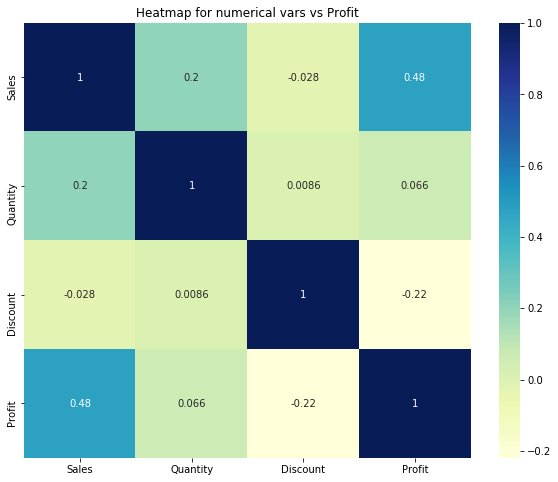

In [297]:
plt.figure(figsize=(10,8))

sns.heatmap(retail.corr(), cmap='YlGnBu', annot=True)
plt.title('Heatmap for numerical vars vs Profit')
plt.show()

By looking at the heatmap we can observe that sales has a strong positive correlation with profit while discount has negative correlation with profit

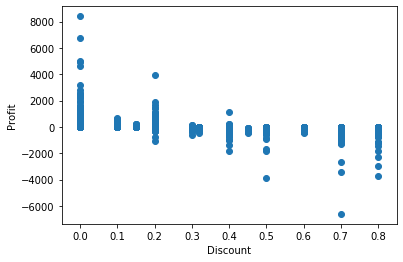

In [298]:
# Profit Vs Discount
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.scatter(retail['Discount'],retail['Profit'])
plt.show()

We can see that se discount increases the profit starts decreasing

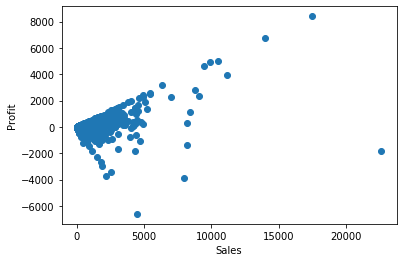

In [299]:
# Profit Vs Discount
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.scatter(retail['Sales'],retail['Profit'])
plt.show()

We can see that Profit shows an increasing trend with the increase in sales with few exceptions

In [300]:
retail['Profit'].groupby(retail['Segment']).sum()

Segment
Consumer       134119.2092
Corporate       91979.1340
Home Office     60298.6785
Name: Profit, dtype: float64

By looking at the customer segment we can see that 'Consumer' is contributing more to profit and we need to focus on Home Office segment to gain more profit from there.

In [301]:
retail['Profit'].groupby(retail['City']).sum().sort_values(ascending=False)

City
New York City       62036.9837
Others              34178.6719
Los Angeles         30440.7579
Seattle             29156.0967
San Francisco       17507.3854
Detroit             13181.7908
Lafayette           10018.3876
Jackson              7581.6828
Atlanta              6993.6629
Minneapolis          6824.5846
San Diego            6377.1960
Springfield          6200.6974
Columbus             5897.1013
Newark               5793.7588
Columbia             5606.1167
Richmond             5567.2486
Providence           5505.6569
Henderson            4911.8609
Arlington            4169.6969
Lakewood             3234.0278
Milwaukee            2793.0851
Yonkers              2767.7557
Indianapolis         2741.6538
Roswell              2427.4353
Lawrence             2382.1465
Midland              2293.6828
North Las Vegas      2247.6899
Mobile               2175.8292
Florence             2168.9661
Long Beach           2108.9306
Sacramento           2069.6859
Virginia Beach       2024.8837
Wil

We can see that New York City, Los Angeles, Seattle,San Francisco and Detroit are among the top 5 cities from where maximum profit is comming. While some of the cities where company is making huge losses are Philadelphia, Houston,San Antonio,Lancaster and Chicago to name a few and company need to reconsider it's current strategies in these cities. 

In [302]:
retail['Profit'].groupby(retail['Region']).sum().sort_values(ascending=False)

Region
West       108418.4489
East        91522.7800
South       46749.4303
Central     39706.3625
Name: Profit, dtype: float64

We can see that central region is contributing least to profit. Lets try to dig a bit deeper and find the answer.

In [303]:
# Lets see the no of orders region wise
retail['Quantity'].groupby(retail['Region']).sum().sort_values(ascending=False)

Region
West       12266
East       10618
Central     8780
South       6209
Name: Quantity, dtype: int64

We can see that Order quantity in central region is not the least but still it is generating least profit. 

In [304]:
# Let's see the distribution Region, state and City wise 
retail.groupby(['Region','State','City','Quantity']).sum()

Sales  Discount  \
Region  State                City             Quantity                         
Central Illinois             Aurora           1           157.7190      1.50   
                                              2          1778.9880      2.70   
                                              3           786.9480      2.20   
                                              4          2586.7360      2.20   
                                              5           723.4200      1.30   
                                              6           484.5120      0.40   
                                              7           970.6690      2.30   
                                              8            60.2880      0.60   
                                              9            23.6880      0.20   
                             Bloomington      1           180.0160      0.20   
                                              2            53.7760      0.80   
                                              3            39.8160      0.20   
                                              4            59.5120      1.00   
                                              5            13.1200      0.20   
                                              6           617.7000      0.50   
                             Chicago          1           855.2920     11.90   
                                              2          9019.2480     32.10   
                                              3         10313.7810     33.70   
                                              4          5063.8400      9.60   
                                              5          9244.5100     13.90   
                                              6          4622.3040      5.50   
                                              7          2887.1290      5.80   
                                              8           924.4640      1.40   
                                              9          5065.2810      5.20   
                                              11          153.8240      0.20   
                                              13          335.6600      1.00   
                                              14           54.2080      0.20   
                             Decatur          1             7.6920      0.60   
                                              2            99.7760      1.10   
                                              3          1947.5730      2.90   
                                              4           136.1600      0.80   
                                              6           507.9840      0.40   
                                              7           470.2880      0.80   
                             Freeport         2            45.2480      0.20   
                                              3            73.7880      0.80   
                                              4            96.7840      0.80   
                             Others           1           298.3920      0.40   
                                              2           865.5380      6.10   
                                              3          2934.1980      5.40   
                                              4          3167.9800      2.10   
                                              5          2435.4900      5.10   
                                              6          1462.1160      1.90   
                                              7          1562.9670      3.10   
                                              8           878.2880      1.30   
                                              9           143.8560      0.20   
                             Peoria           2           116.3320      0.90   
                                              3           379.4880      1.70   
                                              5             5.6600      1.60   
                             Quincy           2            29

In [305]:
retail.head(10)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,Los Angeles,California,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,Los Angeles,California,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


Lets see how Ship Mode is affecting the profit  

In [306]:
retail['Profit'].groupby(retail['Ship Mode']).sum().sort_values(ascending=False)

Ship Mode
Standard Class    164088.7875
Second Class       57446.6354
First Class        48969.8399
Same Day           15891.7589
Name: Profit, dtype: float64

In [307]:
retail['Quantity'].groupby(retail['Ship Mode']).sum().sort_values(ascending=False)

Ship Mode
Standard Class    22797
Second Class       7423
First Class        5693
Same Day           1960
Name: Quantity, dtype: int64

We can see that Standard Class contributes more towards Profit as well as Quantity

In [308]:
sub_cat_profit =retail['Profit'].groupby(retail['Sub-Category']).sum().sort_values(ascending=False)
sub_cat_profit

Sub-Category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          34053.5693
Binders        30221.7633
Chairs         26590.1663
Storage        21278.8264
Appliances     18138.0054
Furnishings    13059.1436
Envelopes       6964.1767
Art             6527.7870
Labels          5546.2540
Machines        3384.7569
Fasteners        949.5182
Supplies       -1189.0995
Bookcases      -3472.5560
Tables        -17725.4811
Name: Profit, dtype: float64

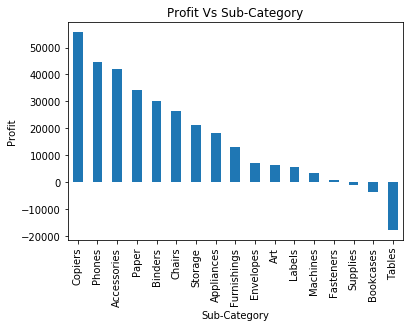

In [309]:
plt.title('Profit Vs Sub-Category')
plt.xlabel('Sub_Category')
plt.ylabel('Profit')
sub_cat_profit.plot.bar()
plt.show()

In [310]:
sub_cat= retail['Quantity'].groupby(retail['Sub-Category']).sum().sort_values(ascending=False)
sub_cat

Sub-Category
Binders        5974
Paper          5178
Furnishings    3563
Phones         3289
Storage        3158
Art            3000
Accessories    2976
Chairs         2356
Appliances     1729
Labels         1400
Tables         1241
Fasteners       914
Envelopes       906
Bookcases       868
Supplies        647
Machines        440
Copiers         234
Name: Quantity, dtype: int64

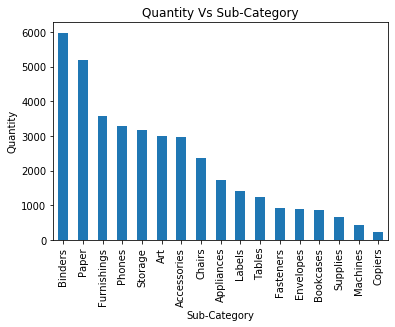

In [311]:
plt.title('Quantity Vs Sub-Category')
plt.xlabel('Sub_Category')
plt.ylabel('Quantity')
sub_cat.plot.bar()
plt.show()

From the above two graphs we can observe that 'Tables','Bookcases' and 'Supplies' are three Sub-Categories where the company need to focus more. 

#### After carefully analysing the data we able to identify specific zone/state/city where the company need to focus to increase profit. We are also able to identify categories and sub-categories which were making losses and company need to focus more.  